In [ ]:
%matplotlib inline

import cv2
import math
import numpy as np
import pandas as pd
from sys import argv
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

## Show Image

In [ ]:
def show_image(img, name= "Image"):
  print("\n\n",name)
  print("actual size")
  cv2_imshow(img)

  print("zoomed size")
  plt.imshow(img, cmap= "gray")
  plt.show()


## Zero Padding

In [ ]:
def zero_padding(tempImage):
  H, W = tempImage.shape
  
  tempImage = np.concatenate((tempImage, np.zeros((1,W), dtype= tempImage.dtype)), axis=0)
  tempImage = np.concatenate((np.zeros((1,W), dtype= tempImage.dtype), tempImage), axis=0)
  
  H += 2
  tempImage = np.concatenate((tempImage, np.zeros((H,1), dtype= tempImage.dtype)), axis=1)
  tempImage = np.concatenate((np.zeros((H,1), dtype= tempImage.dtype), tempImage), axis=1)
  
  return tempImage

# **Template Maching**

## Cross Correlation

In [ ]:
def cross_correlation(tempImage, tempfilter, flag= False):
  
  tempImage = zero_padding(tempImage)

  if flag:  
    print(tempImage)

  H, W = tempImage.shape
  M, N = tempfilter.shape

  newImage = np.array (np.full((H-M+1, W-N+1), 0), dtype = np.double )

  for i in range(0, H-M+1):
    for j in range(0, W-N+1):
    
      tempPart = tempImage[i:i+M, j:j+N]
      tempResult = tempPart * tempfilter

      newImage[i, j] = np.around(np.sum(tempResult),2)

      if flag:  
        print("Sum:", np.around(np.sum(tempResult),2), sep = "\t")
        print(pd.DataFrame(newImage))

  return newImage

## Sum of Squared Distance

In [ ]:
def sum_of_squared_distance(tempImage, tempfilter, flag= False):
  
  tempImage = zero_padding(tempImage)

  if flag:  
    print(tempImage)

  H, W = tempImage.shape
  M, N = tempfilter.shape

  newImage = np.array (np.full((H-M+1, W-N+1), 0), dtype = np.double )

  for i in range(0, H-M+1):
    for j in range(0, W-N+1):
    
      tempPart = tempImage[i:i+M, j:j+N]

      tempDiff =  tempPart - tempfilter

      tempResult = tempDiff * tempDiff

      newImage[i, j] = np.around(np.sum(tempResult),2)

      if flag:  
        print("Sum:", np.around(np.sum(tempResult),2), sep = "\t")
        print(pd.DataFrame(newImage))


  # return np.max(newImage) - newImage
  return newImage

## Normalized Cross Corelation

In [ ]:
def normalized_cross_corelation(tempImage, tempfilter, flag= False):
  
  tempImage = zero_padding(tempImage)

  if flag:  
    print(tempImage)

  H, W = tempImage.shape
  M, N = tempfilter.shape

  newImage = np.array (np.full((H-M+1, W-N+1), 0), dtype = np.double )

  for i in range(0, H-M+1):
    for j in range(0, W-N+1):
    
      tempPart = tempImage[i:i+M, j:j+N]
      tempResult = tempPart * tempfilter

      tempDiv = np.sqrt(np.sum(tempPart * tempPart))


      newImage[i, j] = np.round(np.sum(tempResult) / tempDiv , 2)

      if flag:  
        print("\nCross Corelation:", np.around(np.sum(tempResult), 2), sep = "\t")
        print("Divider:", np.around(tempDiv, 2),  sep = "\t")
        print("\nAns:", np.around(np.sum(tempResult) / tempDiv , 2), sep = "\t")

        print(pd.DataFrame(newImage))

  return newImage

## Results

In [ ]:
image = np.array([[1, 1, 1, 1, 1, 1],
                  [1, 20, 2, 2, 2, 1],
                  [1, 2, 3, 3, 2, 1],
                  [1, 2, 3, 3, 2, 1],
                  [1, 2, 2, 2, 2, 1],
                  [1, 1, 1, 1, 1, 1]])

filtr = np.array([[3,3,2],
                  [3,3,2],
                  [2,2,2]])

# filtr = np.array([[1,1,1],
#                   [1,20,2],
#                   [1,2,3]])

In [ ]:
# showPrint = False
showPrint = True
# result = cross_correlation(image, filtr, showPrint)
# result = sum_of_squared_distance(image, filtr, showPrint)
result = normalized_cross_corelation(image, filtr, showPrint)

print("Result:")
pd.DataFrame(result)

[[ 0  0  0  0  0  0  0  0]
 [ 0  1  1  1  1  1  1  0]
 [ 0  1 20  2  2  2  1  0]
 [ 0  1  2  3  3  2  1  0]
 [ 0  1  2  3  3  2  1  0]
 [ 0  1  2  2  2  2  1  0]
 [ 0  1  1  1  1  1  1  0]
 [ 0  0  0  0  0  0  0  0]]

Cross Corelation:	47
Divider:	20.07

Ans:	2.34
      0    1    2    3    4    5
0  2.34  0.0  0.0  0.0  0.0  0.0
1  0.00  0.0  0.0  0.0  0.0  0.0
2  0.00  0.0  0.0  0.0  0.0  0.0
3  0.00  0.0  0.0  0.0  0.0  0.0
4  0.00  0.0  0.0  0.0  0.0  0.0
5  0.00  0.0  0.0  0.0  0.0  0.0

Cross Corelation:	54
Divider:	20.2

Ans:	2.67
      0     1    2    3    4    5
0  2.34  2.67  0.0  0.0  0.0  0.0
1  0.00  0.00  0.0  0.0  0.0  0.0
2  0.00  0.00  0.0  0.0  0.0  0.0
3  0.00  0.00  0.0  0.0  0.0  0.0
4  0.00  0.00  0.0  0.0  0.0  0.0
5  0.00  0.00  0.0  0.0  0.0  0.0

Cross Corelation:	56
Divider:	20.27

Ans:	2.76
      0     1     2    3    4    5
0  2.34  2.67  2.76  0.0  0.0  0.0
1  0.00  0.00  0.00  0.0  0.0  0.0
2  0.00  0.00  0.00  0.0  0.0  0.0
3  0.00  0.00  0.00  0.0  0.0  

,0,1,2,3,4,5
0,2.34,2.67,2.76,5.16,5.20,4.54
1,2.67,4.24,4.52,6.58,6.67,6.06
2,2.76,4.52,5.03,7.22,7.07,6.20
3,5.16,6.58,7.22,7.48,7.23,6.20
4,5.20,6.67,7.07,7.23,7.26,6.35
5,4.54,6.06,6.20,6.20,6.35,5.67


# **Hough Transform**

In [ ]:
def plotLines(Xs, Y):

  for X in Xs:
    plt.plot(Y,X)

  plt.grid()
  plt.show()

## Straingt Line (y = mx+c)

In [ ]:
def straight_line(points, interval):
  
  allLines = []
  for xy in points:

    print("\nX: ", xy[0], "Y:", xy[1])

    D = np.around((xy[1] / xy[0]), 2)
    G = np.around((-1 / xy[0]), 2)

    print("D: ", D, "G:", G)

    cVal = []

    for mVal in interval:
      cVal.append( np.around((( mVal - D ) / G), 2) )

    # print(np.array(range(interval[0], interval[1]+1)))
    print("C:", np.array(cVal))
    allLines.append(np.array(cVal))
  
  plotLines(np.array(allLines), interval)
  # print(np.array(allLines)) 


Interval: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]

X:  2 Y: 6
D:  3.0 G: -0.5
C: [ 26.  24.  22.  20.  18.  16.  14.  12.  10.   8.   6.   4.   2.  -0.
  -2.  -4.  -6.  -8. -10. -12. -14.]

X:  1 Y: 8
D:  8.0 G: -1.0
C: [18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.
 -0. -1. -2.]

X:  3 Y: 4
D:  1.33 G: -0.33
C: [ 34.33  31.3   28.27  25.24  22.21  19.18  16.15  13.12  10.09   7.06
   4.03   1.    -2.03  -5.06  -8.09 -11.12 -14.15 -17.18 -20.21 -23.24
 -26.27]


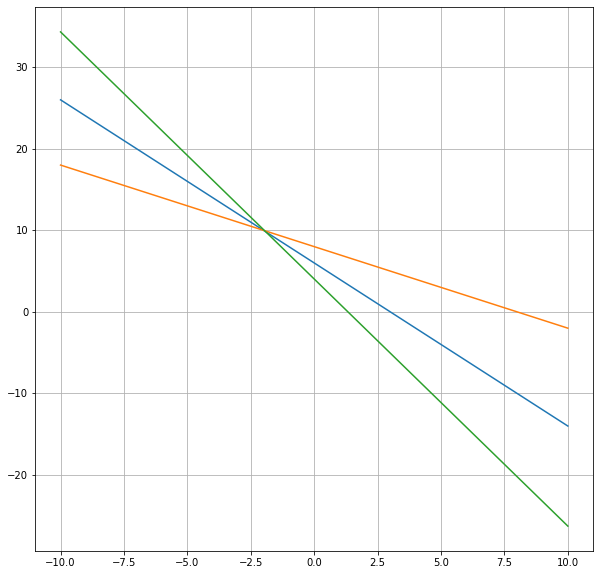

In [ ]:
points = np.array([[2,6],[1,8],[3,4]])

interval = np.array(range(-10, 11))

# interval = np.array([-10,0,10])

print("Interval:", interval )
straight_line(points, interval)

## Normal Line (r, ϑ)


In [ ]:
def normal_line(points, interval):
  
  allLines = []
  for xy in points:

    print("\nX: ", xy[0], "Y:", xy[1])

    rVal = []

    for qVal in interval:
      r = np.around( (math.cos(math.radians(qVal))*xy[0] + math.sin(math.radians(qVal))*xy[1]), 2)
      rVal.append(r)

    print("R:", np.array(rVal))
    allLines.append(np.array(rVal))
  
  plotLines(np.array(allLines), interval)
  # print(np.array(allLines)) 


Interval: [ 70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110]

X:  0 Y: 6
R: [5.64 5.67 5.71 5.74 5.77 5.8  5.82 5.85 5.87 5.89 5.91 5.93 5.94 5.96
 5.97 5.98 5.99 5.99 6.   6.   6.   6.   6.   5.99 5.99 5.98 5.97 5.96
 5.94 5.93 5.91 5.89 5.87 5.85 5.82 5.8  5.77 5.74 5.71 5.67 5.64]

X:  0 Y: 10
R: [ 9.4   9.46  9.51  9.56  9.61  9.66  9.7   9.74  9.78  9.82  9.85  9.88
  9.9   9.93  9.95  9.96  9.98  9.99  9.99 10.   10.   10.    9.99  9.99
  9.98  9.96  9.95  9.93  9.9   9.88  9.85  9.82  9.78  9.74  9.7   9.66
  9.61  9.56  9.51  9.46  9.4 ]

X:  1 Y: 1
R: [1.28 1.27 1.26 1.25 1.24 1.22 1.21 1.2  1.19 1.17 1.16 1.14 1.13 1.11
 1.1  1.08 1.07 1.05 1.03 1.02 1.   0.98 0.96 0.95 0.93 0.91 0.89 0.87
 0.85 0.83 0.81 0.79 0.77 0.75 0.73 0.71 0.69 0.66 0.64 0.62 0.6 ]

X:  1 Y: 2
R: [2.22 2.22 2.21 2.2  2.2  2.19 2.18 2.17 2.16 2.15 2.14 2.13 2.12 2.11
 2.09 2.08 2.06 2.05 

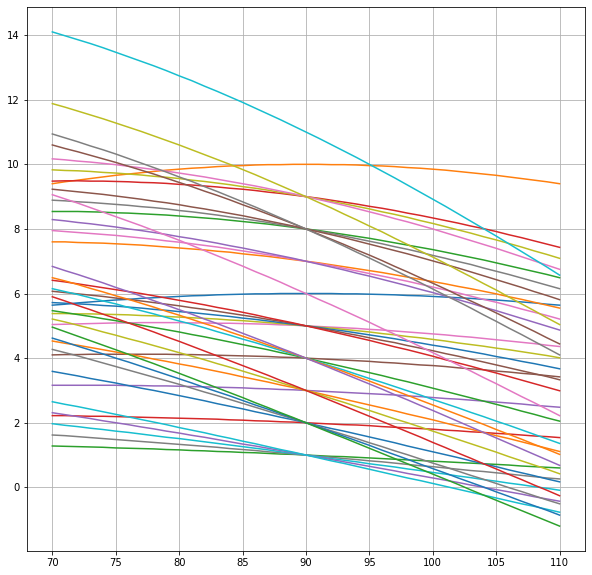

In [ ]:
points = np.array([[0,6],[0,10],
                   [1,1],[1,2],[1,3],[1,4],[1,5],
                   [2,1],[2,5],
                   [3,1],[3,5],[3,7],[3,8],[3,9],
                   [4,1],[4,5],[4,7],[4,8],[4,9],
                   [5,1],[5,2],[5,3],[5,4],[5,5],[5,7],[5,8],[5,9],
                   [7,2],[7,3],[7,4],
                   [8,2],[8,4],
                   [9,2],[9,3],[9,4],[9,8],
                   [10,6],[10,8],[10,9],
                   [11,11]])

interval = np.array(range(70, 111, 1))

print("Interval:", interval )
normal_line(points, interval)


In [ ]:
q = 90
r = 8

m = np.around( ( - math.cos(math.radians(q)) / math.sin(math.radians(q))), 5)
c = np.around( ( r / math.sin(math.radians(q))), 5)
 
print("y = ", m ,"x + ", c)

y =  -0.0 x +  8.0


# **Co-occurrence Featture**

In [ ]:
GLCM =  np.array([[1,2,0,0,0,1,1,0],
                  [0,0,0,0,1,1,0,0],
                  [0,1,0,1,0,0,0,0],
                  [0,0,1,0,1,0,0,0],
                  [2,0,1,0,1,0,0,0],
                  [1,3,0,0,0,0,0,1],
                  [0,0,0,0,1,1,0,2],
                  [1,0,0,0,0,2,2,1]])

print("GLCM", GLCM, sep = "\n")

GLCM
[[1 2 0 0 0 1 1 0]
 [0 0 0 0 1 1 0 0]
 [0 1 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0]
 [2 0 1 0 1 0 0 0]
 [1 3 0 0 0 0 0 1]
 [0 0 0 0 1 1 0 2]
 [1 0 0 0 0 2 2 1]]


In [ ]:
probability = np.around(GLCM / np.sum(GLCM),3)
print("Probability", probability, sep = "\n")
print("Max Probability:", np.max(probability))

Probability
[[0.033 0.067 0.    0.    0.    0.033 0.033 0.   ]
 [0.    0.    0.    0.    0.033 0.033 0.    0.   ]
 [0.    0.033 0.    0.033 0.    0.    0.    0.   ]
 [0.    0.    0.033 0.    0.033 0.    0.    0.   ]
 [0.067 0.    0.033 0.    0.033 0.    0.    0.   ]
 [0.033 0.1   0.    0.    0.    0.    0.    0.033]
 [0.    0.    0.    0.    0.033 0.033 0.    0.067]
 [0.033 0.    0.    0.    0.    0.067 0.067 0.033]]
Max Probability: 0.1


In [ ]:
contrast = 0

for i, row  in enumerate(probability):
  for j, ijP in enumerate(row):
    contrast += ijP * np.power((i-j), 2)

print("Contrast: ", np.around(contrast,3))

Contrast:  8.982


In [ ]:
dissimilarity = 0

for i, row  in enumerate(probability):
  for j, ijP in enumerate(row):
    dissimilarity += ijP * abs(i-j)

print("Dissimilarity: ", np.around(dissimilarity,3))

Dissimilarity:  2.356


In [ ]:
# Inverse Difference Moment
IDM = 0

for i, row  in enumerate(probability):
  for j, ijP in enumerate(row):
    IDM += ijP / (1 + np.power((i-j), 2))

print("IDM: ", np.around(IDM,3))

IDM:  0.334


In [ ]:
# Angular Second Moment (ASM) (aka Uniformity)
ASM = 0

for i, row  in enumerate(probability):
  for j, ijP in enumerate(row):
    ASM += np.power(ijP, 2)

print("ASM: ", np.around(ASM,3))

ASM:  0.051


In [ ]:
energy = 0

for i, row  in enumerate(probability):
  for j, ijP in enumerate(row):
    energy += np.power(ijP, 2)

print("Energy: ", np.around(np.sqrt(energy),3))

Energy:  0.226


In [ ]:
entropy = 0

for i, row  in enumerate(probability):
  for j, ijP in enumerate(row):

    if ijP != 0:
      entropy += np.power(ijP, 2) * (- np.log(ijP))

print("Entropy: ", np.around(entropy,3))

Entropy:  0.147


# **Otsu's Tresholding**

In [ ]:
def isNull(val):
  if np.isnan(val):
    return 0 
  return np.around(val,5)

In [ ]:
def otsus_algorithim(gray_scale, T):

  back = gray_scale[:T,:]
  Wb = np.sum(back[:,1]) / np.sum(gray_scale[:,1])
  Mb = isNull(( np.sum(back[:,0] * back[:,1]) ) / np.sum(back[:,1]))
  Vb = isNull((np.sum(np.square(back[:,0] - Mb) * back[:,1])) / np.sum(back[:,1]))

  fore = gray_scale[T:,:]
  Wf = np.sum(fore[:,1]) / np.sum(gray_scale[:,1])
  Mf = isNull((np.sum(fore[:,0] * fore[:,1]) ) / np.sum(fore[:,1]))
  Vf = isNull((np.sum(np.square(fore[:,0] - Mf) * fore[:,1])) / np.sum(fore[:,1]))

  WCV = Wb * Vb + Wf * Vf
  BCV = Wb * Wf * np.square( Mb - Mf) 

  desimalPoint = 4
  print("Background: ", back, sep= "\n")
  print("Weight:", np.around(Wb, desimalPoint))
  print("Mean:", np.around(Mb, desimalPoint))
  print("Variance:", np.around(Vb, desimalPoint))

  print("Foreground: ", fore, sep= "\n")
  print("Weight:", np.around(Wf, desimalPoint))
  print("Mean:", np.around(Mf, desimalPoint))
  print("Variance:", np.around(Vf, desimalPoint))
  
  print("Within Class Variance: ", np.around(WCV, desimalPoint))
  print("Between Class Variance: ", np.around(BCV, desimalPoint))

Result

In [ ]:
# [intensity , frequency]
gray_scale = np.array([[0,5], [1,15], [2,10], [3,20], [4,0], [5,25], [6, 12],[7,21]])

for T in range(gray_scale.shape[0]):
  print("\n*************************************")
  print("T: ", T)
  otsus_algorithim(gray_scale, T)


*************************************
T:  0
Background: 
[]
Weight: 0.0
Mean: 0
Variance: 0
Foreground: 
[[ 0  5]
 [ 1 15]
 [ 2 10]
 [ 3 20]
 [ 4  0]
 [ 5 25]
 [ 6 12]
 [ 7 21]]
Weight: 1.0
Mean: 4.0648
Variance: 4.968
Within Class Variance:  4.968
Between Class Variance:  0.0

*************************************
T:  1
Background: 
[[0 5]]
Weight: 0.0463
Mean: 0.0
Variance: 0.0
Foreground: 
[[ 1 15]
 [ 2 10]
 [ 3 20]
 [ 4  0]
 [ 5 25]
 [ 6 12]
 [ 7 21]]
Weight: 0.9537
Mean: 4.2621
Variance: 4.3682
Within Class Variance:  4.1659
Between Class Variance:  0.8021

*************************************
T:  2
Background: 
[[ 0  5]
 [ 1 15]]
Weight: 0.1852
Mean: 0.75
Variance: 0.1875
Foreground: 
[[ 2 10]
 [ 3 20]
 [ 4  0]
 [ 5 25]
 [ 6 12]
 [ 7 21]]
Weight: 0.8148
Mean: 4.8182
Variance: 2.9897
Within Class Variance:  2.4707
Between Class Variance:  2.4973

*************************************
T:  3
Background: 
[[ 0  5]
 [ 1 15]
 [ 2 10]]
Weight: 0.2778
Mean: 1.1667
Variance: 0.4722
Fore

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
